# Common imports / necessary helpful functions

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
#Common imports
from Bio import SeqIO
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd

#My helper library for this analysis
import sequencing_analysis_library as SAL

In [3]:
genome_file = '/Users/adamhockenberry/Projects/Neisseria/Data/Genomes/fa1090.gb'
genome = list(SeqIO.parse(genome_file, 'genbank'))[0]

In [4]:
sample_files = ['SQ-1', 'SQ-2', 'SQ-3', 'SQ-4', 'SQ-5', 'SQ-6']
organism = 'Neisseria'
file_ending = '_15_100_all'

fpkm_dict_meta, feature_dict, sequencing_dict_meta_f, sequencing_dict_meta_r =\
        SAL.wiggle_to_sequencing(genome, sample_files, organism, file_ending, feature_type='CDS')

SQ-1: Total reads mapped:36867803.00010039 Percentage mapped to feature:86.60295738598663
SQ-2: Total reads mapped:27278803.73762074 Percentage mapped to feature:83.59493058432895
SQ-3: Total reads mapped:23491709.157121595 Percentage mapped to feature:85.64459481860725
SQ-4: Total reads mapped:16190652.508570375 Percentage mapped to feature:85.36258437854744
SQ-5: Total reads mapped:30839689.291754577 Percentage mapped to feature:86.67537726062827
SQ-6: Total reads mapped:21644564.32345894 Percentage mapped to feature:87.998864419237


In [5]:
sample_files = ['SQ-13', 'SQ-14', 'SQ-15', 'SQ-16', 'SQ-17', 'SQ-18']
# ending = '_15_45_-1'
file_ending = '_15_45_all'
organism = 'Neisseria'

fpkm_dict_meta_ribo, feature_dict_ribo, sequencing_dict_meta_f_ribo, sequencing_dict_meta_r_ribo =\
        SAL.wiggle_to_sequencing(genome, sample_files, organism, file_ending, feature_type='CDS')

SQ-13: Total reads mapped:281998.0349482321 Percentage mapped to feature:37.43853663245781
SQ-14: Total reads mapped:724592.2887661391 Percentage mapped to feature:38.326341607019806
SQ-15: Total reads mapped:248384.19101864976 Percentage mapped to feature:38.01148320200287
SQ-16: Total reads mapped:836388.3872506594 Percentage mapped to feature:37.7027642369858
SQ-17: Total reads mapped:765652.0417670998 Percentage mapped to feature:37.039053095525155
SQ-18: Total reads mapped:983341.0624742247 Percentage mapped to feature:36.756669354863575


In [6]:
data_pairs = [('SQ-1', 'SQ-13'),
              ('SQ-2', 'SQ-14'),
              ('SQ-3', 'SQ-15'),
              ('SQ-4', 'SQ-16'),
              ('SQ-5', 'SQ-17'),
              ('SQ-6', 'SQ-18')]

teff_dict_meta = {}
for rna_seq, ribo_seq in data_pairs:
    teff_dict_meta[rna_seq] = {}
    for gene in feature_dict.keys():
        try:
            teff_dict_meta[rna_seq][gene] = fpkm_dict_meta_ribo[ribo_seq][gene]/fpkm_dict_meta[rna_seq][gene]
        except:
            pass

NGO1550 0.00966361976502 1.30985331419 0.806652275017
NGO0025 5.94533504573e-05 83.3649600316 2.34270821014
NGO0112 0.00258750899687 42.5263802125 18.5733014382
NGO0554 0.000758330930266 12.8701698327 0.293358068013
NGO2065 0.00823311789672 2.51306538014 0.820872593526
NGO1046 0.00108836661711 0.547464070363 0.150309883134
NGO1405 0.00414761899695 5.37302198974 2.61233976452
NGO0102 0.00281531019272 9.85280360694 4.26418452745
NGO0851 0.00185641228669 7.48057460489 3.92882335027
NGO2111 0.00838715086618 25.6143050146 8.4842074584
NGO1769 0.00167290670925 0.838278719295 3.73236851679
NGO1978 1.2487382743e-05 7.80746101218 28.0075394204
NGO0848 0.00974820905966 1.04019318343 0.354002747904
NGO1902 0.00269015305864 1.29576288423 0.151294473994
NGO0469 0.00133861530958 18.626208306 3.84315665498
NGO1552a 0.00445483984112 0.470326051048 0.237016215018
NGO1559 0.00104167692739 0.514013930923 0.31072459477
NGO1029 0.000983909323085 2.10070317653 0.373139068829
NGO1377 0.00397460239228 8.47075

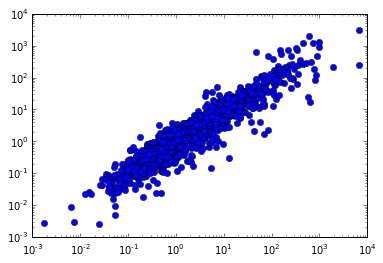

In [7]:
condition_a_labels = ['SQ-1', 'SQ-3', 'SQ-5']
condition_b_labels = ['SQ-2', 'SQ-4', 'SQ-6']
condition_a = []
condition_b = []
for gene in feature_dict:
    temp_a = []
    for sample in condition_a_labels:
        if gene in teff_dict_meta[sample]:
            temp_a.append(teff_dict_meta[sample][gene])
    temp_b = []
    for sample in condition_b_labels:
        if gene in teff_dict_meta[sample]:
            temp_b.append(teff_dict_meta[sample][gene])
    if len(temp_a) == len(condition_a_labels) and len(temp_b) == len(condition_b_labels):
        if min(temp_a + temp_b) > 0:
            condition_a.append(np.mean(temp_a))
            condition_b.append(np.mean(temp_b))
            tval, pval = stats.ttest_ind(np.log(temp_a), np.log(temp_b))
            if pval < 0.01:
                print(gene, pval, np.mean(temp_a), np.mean(temp_b))
print(len(condition_a), stats.spearmanr(condition_a, condition_b))
plt.figure()
plt.loglog(condition_a,condition_b, 'bo')

In [16]:
condition_a_labels = ['SQ-1', 'SQ-3', 'SQ-5']
condition_b_labels = ['SQ-2', 'SQ-4', 'SQ-6']
gene_names = []
col_names = ['TEFF(SQ-13/SQ-1)','TEFF(SQ-15/SQ-3)','TEFF(SQ-17/SQ-5)',\
             'TEFF(SQ-14/SQ-2)','TEFF(SQ-16/SQ-4)','TEFF(SQ-18/SQ-6)',\
             'Avg (normal)', 'St.Dev. (normal)',\
             'Avg (oxidative)', 'St.Dev. (oxidative)',\
             'T-test(p-value) on log transformed RPKM']

data_table = []
for gene in feature_dict:
    temp_a = []
    for sample in condition_a_labels:
        if gene in teff_dict_meta[sample]:
            temp_a.append(teff_dict_meta[sample][gene])
    temp_b = []
    for sample in condition_b_labels:
        if gene in teff_dict_meta[sample]:
            temp_b.append(teff_dict_meta[sample][gene])
    if len(temp_a) != len(condition_a_labels) or len(temp_b) != len(condition_b_labels):
        continue
    if min(temp_a + temp_b) == 0:
        continue
    gene_names.append(gene)    
    a = teff_dict_meta['SQ-1'][gene]
    c = teff_dict_meta['SQ-3'][gene]
    e = teff_dict_meta['SQ-5'][gene]
    
    b = teff_dict_meta['SQ-2'][gene]
    d = teff_dict_meta['SQ-4'][gene]
    f = teff_dict_meta['SQ-6'][gene]
    
    condition_1 = [a, c, e]
    condition_2 = [b, d, f]
    t_val, p_val= stats.ttest_ind(np.log(condition_1), np.log(condition_2))
    
    data_table.append([a, c, e, b, d, f,\
                       np.mean(condition_1), np.std(condition_1),\
                       np.mean(condition_2), np.std(condition_2),\
                       p_val])

df = pd.DataFrame(data_table, index=gene_names, columns=col_names)
sort_df = df.sort('T-test(p-value) on log transformed RPKM')
sort_df.to_excel('../Results/Neisseria_gonorrhea_Trans_Eff.xlsx', sheet_name='Sheet1')

In [17]:
df.sort('T-test(p-value) on log transformed RPKM')

,TEFF(SQ-13/SQ-1),TEFF(SQ-15/SQ-3),TEFF(SQ-17/SQ-5),TEFF(SQ-14/SQ-2),TEFF(SQ-16/SQ-4),TEFF(SQ-18/SQ-6),Avg (normal),St.Dev. (normal),Avg (oxidative),St.Dev. (oxidative),T-test(p-value) on log transformed RPKM
NGO1978,8.116735,7.176215,8.129433,26.832474,27.865487,29.324657,7.807461,0.446388,28.007539,1.022375,0.000012
NGO0025,76.695184,66.493748,106.905948,2.927123,1.776766,2.324235,83.364960,17.159077,2.342708,0.469813,0.000059
NGO0554,18.811927,12.796377,7.002205,0.439847,0.279350,0.160878,12.870170,4.821581,0.293358,0.114319,0.000758
NGO1029,1.826071,1.544040,2.931998,0.392110,0.380778,0.346529,2.100703,0.598985,0.373139,0.019377,0.000984
NGO1559,0.542406,0.505745,0.493891,0.304467,0.285945,0.341762,0.514014,0.020651,0.310725,0.023213,0.001042
NGO1046,0.571671,0.471904,0.598818,0.118859,0.190114,0.141956,0.547464,0.054567,0.150310,0.029683,0.001088
NGO0469,17.402062,18.740976,19.735587,2.534106,4.019940,4.975424,18.626208,0.956108,3.843157,1.004473,0.001339
NGO1769,0.962800,0.626786,0.925250,4.862066,3.216342,3.118698,0.838279,0.150332,3.732369,0.799811,0.001673
NGO1370,2.352805,5.243266,4.944400,43.023576,26.809996,37.865276,4.180157,1.297881,35.899616,6.763525,0.001732
NGO0851,7.446805,7.668774,7.326145,3.434111,4.616996,3.735363,7.480575,0.141901,3.928823,0.501913,0.001856


In [18]:
df = pd.read_excel('../Results/Neisseria_gonorrhea_Trans_Eff.xlsx', sheet_name='Sheet1')

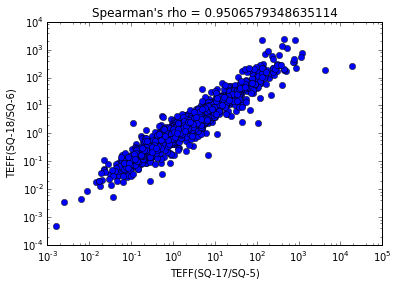

In [20]:
to_compare_a = 'TEFF(SQ-17/SQ-5)'
to_compare_b = 'TEFF(SQ-18/SQ-6)'
SAL.plot_correlations_single(to_compare_a, to_compare_b, df, save_file_name='Teff_sample_3')

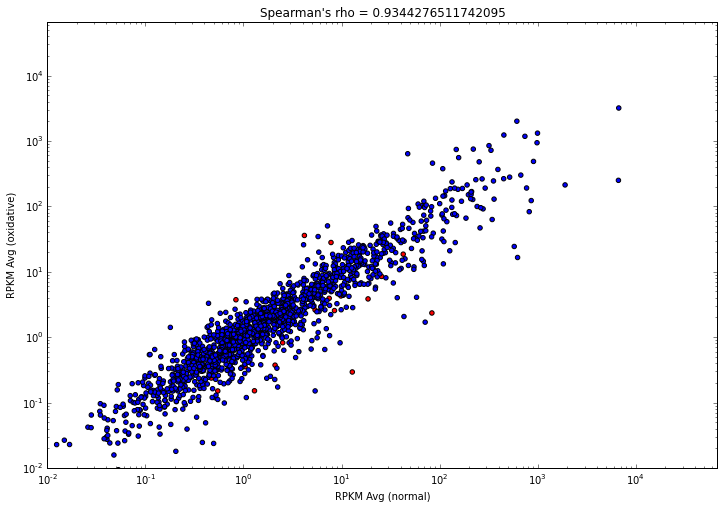

In [19]:
to_compare_a = 'Avg (normal)'
to_compare_b = 'Avg (oxidative)'
SAL.plot_correlations_combined(to_compare_a, to_compare_b, df, p_val_threshold=0.01, save_file_name='teff_combined.pdf')